# Satellite image classification using InceptionV3

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.applications import InceptionV3
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img

/home/vitaliy/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Global parameters
image_size = 256
train_folder = "Images/train/"
test_folder = "Images/test/"
train_batchsize = 64
val_batchsize = 16

In [4]:
def create_model_with_additional_layers(model_name, image_size):
    if model_name == "vgg16":
        pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "vgg19":
        pretrained_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "xception":
        pretrained_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "resnet50":
        pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "inceptionV3":
        pretrained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "inceptionresnetV2":
        pretrained_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "mobilenet":
        pretrained_model = MobileNet(weights="imagenet", include_top=False, input_shape=(image_size, image_size, 3))
    else:
        pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    # Freeze all the layers
    for layer in pretrained_model.layers[:]:
        layer.trainable = False
    # Check the trainable status of the individual layers
    for layer in pretrained_model.layers:
        print(layer, layer.trainable)
    # Create the model
    model = models.Sequential()
    # Add the vgg convolutional base model
    model.add(pretrained_model)
    # Add new layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(21, activation='softmax'))
    # Show a summary of the model. Check the number of trainable parameters
    print(model.summary())
    return model

In [5]:
def create_model_with_retrainable_layers(model_name, image_size):
    if model_name == "vgg16":
        pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "vgg19":
        pretrained_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "xception":
        pretrained_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "resnet50":
        pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "inceptionV3":
        pretrained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    else:
        pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

    # Freeze all the layers
    for layer in pretrained_model.layers[:-4]:
        layer.trainable = False

    # Check the trainable status of the individual layers
    for layer in pretrained_model.layers:
        print(layer, layer.trainable)

    # Create the model
    model = models.Sequential()
    # Add the vgg convolutional base model
    model.add(pretrained_model)
    # Add new layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(21, activation='softmax'))
    # Show a summary of the model. Check the number of trainable parameters
    print(model.summary())
    return model

In [6]:
def create_model_with_retrainable_layers(model_name, image_size):
    if model_name == "vgg16":
        pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "vgg19":
        pretrained_model = VGG19(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "xception":
        pretrained_model = Xception(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "resnet50":
        pretrained_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    elif model_name == "inceptionV3":
        pretrained_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    else:
        pretrained_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

    # Freeze all the layers
    for layer in pretrained_model.layers[:-4]:
        layer.trainable = False

    # Check the trainable status of the individual layers
    for layer in pretrained_model.layers:
        print(layer, layer.trainable)

    # Create the model
    model = models.Sequential()
    # Add the vgg convolutional base model
    model.add(pretrained_model)
    # Add new layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(21, activation='softmax'))
    # Show a summary of the model. Check the number of trainable parameters
    print(model.summary())
    return model

In [11]:
def train_model(model, train_folder, test_folder, train_batchsize, val_batchsize, image_size, filename,
                epochs = 3,classmode='categorical', lr=1e-4):
    # No Data augmentation
    train_datagen = ImageDataGenerator(rescale=1./255)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    # Data Generator for Training data
    train_generator = train_datagen.flow_from_directory(
            train_folder,
            target_size=(image_size, image_size),
            batch_size=train_batchsize,
            class_mode=classmode)

    # Data Generator for Validation data
    validation_generator = validation_datagen.flow_from_directory(
            test_folder,
            target_size=(image_size, image_size),
            batch_size=val_batchsize,
            class_mode=classmode,
            shuffle=False)

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(lr=lr),
                  metrics=['acc'])

    # Train the Model
    history = model.fit_generator(
      train_generator, train_generator.n // train_batchsize, epochs=epochs, workers=4,
        validation_data=validation_generator, validation_steps=validation_generator.n // val_batchsize)

    # Save the Model
    model.save(filename)
    return model, history

In [7]:
def plot_training_process(history):
    # Plot the accuracy and loss curves
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [8]:
from random import randint

def show_result(model, test_folder, image_size, classmode='categorical'):
    validation_datagen = ImageDataGenerator(rescale=1. / 255)

    # Create a generator for prediction
    validation_generator = validation_datagen.flow_from_directory(
        test_folder,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

    # Get the filenames from the generator
    fnames = validation_generator.filenames

    # Get the ground truth from generator
    ground_truth = validation_generator.classes

    # Get the label to class mapping from the generator
    label2index = validation_generator.class_indices

    # Getting the mapping from class index to class label
    idx2label = dict((v, k) for k, v in label2index.items())

    # Get the predictions from the model using the generator
    predictions = model.predict_generator(validation_generator,
                                          steps=validation_generator.samples / validation_generator.batch_size,
                                          verbose=1)
    predicted_classes = np.argmax(predictions, axis=1)

    errors = np.where(predicted_classes != ground_truth)[0]
    print("No of errors = {}/{}".format(len(errors), validation_generator.samples))

    # Show the errors
    for i in range(5):
        pred_class = np.argmax(predictions[errors[i]])
        pred_label = idx2label[pred_class]

        title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
            fnames[errors[i]].split('/')[0],
            pred_label,
            predictions[errors[i]][pred_class])

        original = load_img('{}/{}'.format(test_folder, fnames[errors[i]]))
        plt.figure(figsize=[7, 7])
        plt.axis('off')
        plt.title(title)
        plt.imshow(original)
        plt.show()

# Experiment 1. Load pretrained model and add 3 more layers

In [9]:
model_inceptionV3 = create_model_with_additional_layers('inceptionV3', image_size=image_size)

<keras.engine.topology.InputLayer object at 0x7f33f403d198> False
<keras.layers.convolutional.Conv2D object at 0x7f343faaa588> False
<keras.layers.normalization.BatchNormalization object at 0x7f33fc06d550> False
<keras.layers.core.Activation object at 0x7f33f4098400> False
<keras.layers.convolutional.Conv2D object at 0x7f33f4098320> False
<keras.layers.normalization.BatchNormalization object at 0x7f33f403dc50> False
<keras.layers.core.Activation object at 0x7f33eccaf908> False
<keras.layers.convolutional.Conv2D object at 0x7f33ecc616d8> False
<keras.layers.normalization.BatchNormalization object at 0x7f33ecc0ad30> False
<keras.layers.core.Activation object at 0x7f33ecbd1048> False
<keras.layers.pooling.MaxPooling2D object at 0x7f33ecbe4b38> False
<keras.layers.convolutional.Conv2D object at 0x7f33ecb915c0> False
<keras.layers.normalization.BatchNormalization object at 0x7f33ecb70160> False
<keras.layers.core.Activation object at 0x7f33ecb08f60> False
<keras.layers.convolutional.Conv2D 

<keras.layers.core.Activation object at 0x7f33e0207550> False
<keras.layers.convolutional.Conv2D object at 0x7f33e04bcf60> False
<keras.layers.convolutional.Conv2D object at 0x7f33e021ee48> False
<keras.layers.normalization.BatchNormalization object at 0x7f33e0428d30> False
<keras.layers.normalization.BatchNormalization object at 0x7f33e021e940> False
<keras.layers.core.Activation object at 0x7f33e043f588> False
<keras.layers.core.Activation object at 0x7f33e018f898> False
<keras.layers.convolutional.Conv2D object at 0x7f33e03d7be0> False
<keras.layers.convolutional.Conv2D object at 0x7f33e01bd780> False
<keras.layers.normalization.BatchNormalization object at 0x7f33e03ff0f0> False
<keras.layers.normalization.BatchNormalization object at 0x7f33e0152978> False
<keras.layers.core.Activation object at 0x7f33e035f240> False
<keras.layers.core.Activation object at 0x7f33e012f240> False
<keras.layers.pooling.MaxPooling2D object at 0x7f33e00c7cc0> False
<keras.layers.merge.Concatenate object 

In [12]:
model_trained_inceptionV3, history_inceptionV3 = train_model(model=model_inceptionV3, train_folder=train_folder,
                                            test_folder=test_folder, train_batchsize=train_batchsize, val_batchsize=val_batchsize,
                                            image_size=image_size, filename="inceptionV3.h5", lr=1e-5, epochs=20)plot_training_process(history=history_inceptionV3)

Found 6803 images belonging to 21 classes.
Found 1600 images belonging to 21 classes.
Epoch 1/20
106/106 [==============================] - 48s 457ms/step - loss: 1.9699 - acc: 0.4563 - val_loss: 0.7871 - val_acc: 0.7913
Epoch 2/20
106/106 [==============================] - 46s 431ms/step - loss: 0.7251 - acc: 0.7802 - val_loss: 0.5766 - val_acc: 0.8369
Epoch 3/20
106/106 [==============================] - 46s 434ms/step - loss: 0.4011 - acc: 0.8768 - val_loss: 0.5110 - val_acc: 0.8413
Epoch 4/20
106/106 [==============================] - 47s 446ms/step - loss: 0.2668 - acc: 0.9176 - val_loss: 0.4784 - val_acc: 0.8606
Epoch 5/20
106/106 [==============================] - 46s 432ms/step - loss: 0.1799 - acc: 0.9438 - val_loss: 0.4384 - val_acc: 0.8725
Epoch 6/20
106/106 [==============================] - 46s 433ms/step - loss: 0.1276 - acc: 0.9632 - val_loss: 0.4559 - val_acc: 0.8631
Epoch 7/20
106/106 [==============================] - 46s 432ms/step - loss: 0.0994 - acc: 0.9704 - val_

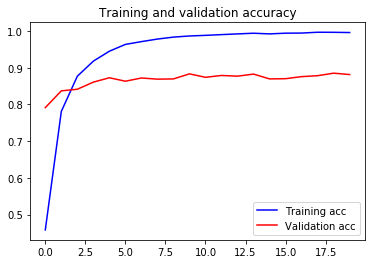

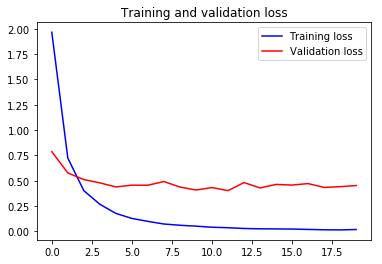

In [13]:
plot_training_process(history=history_inceptionV3)

Found 1600 images belonging to 21 classes.
100/100 [==============================] - 10s 103ms/step
No of errors = 190/1600


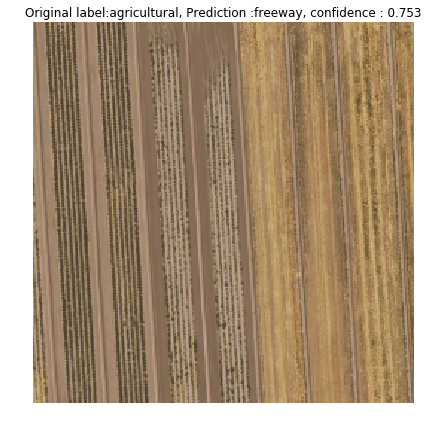

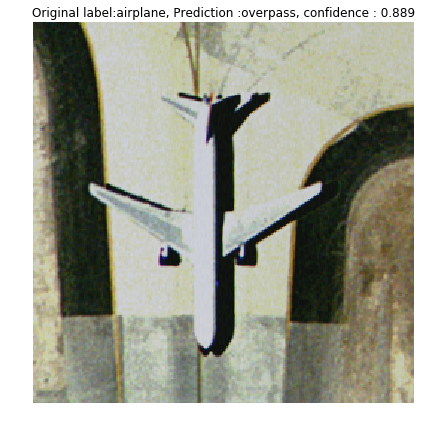

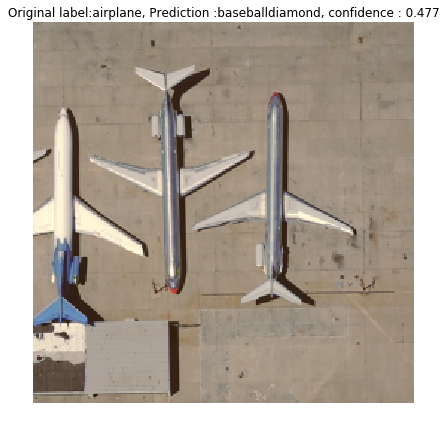

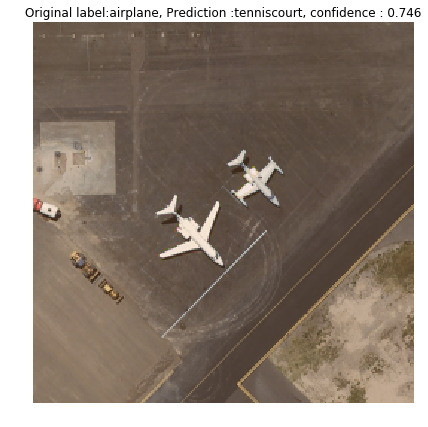

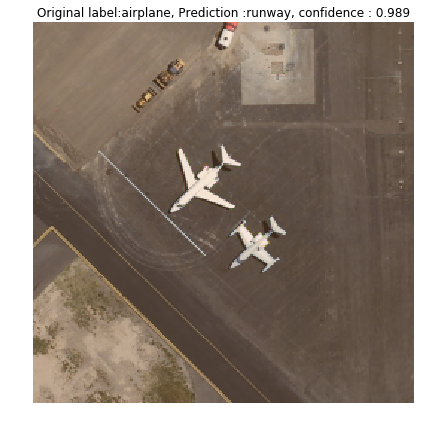

In [14]:
show_result(model=model_trained_inceptionV3, test_folder=test_folder, image_size=image_size)

# Experiment 2. Load pretrained model and retrain last 4 layers

In [15]:
model_inceptionV3_retrainable_layers = create_model_with_retrainable_layers('inceptionV3', image_size=image_size)

<keras.engine.topology.InputLayer object at 0x7f31fc7285f8> False
<keras.layers.convolutional.Conv2D object at 0x7f31fbabe588> False
<keras.layers.normalization.BatchNormalization object at 0x7f31fbaea3c8> False
<keras.layers.core.Activation object at 0x7f31fbb32320> False
<keras.layers.convolutional.Conv2D object at 0x7f31fba98a58> False
<keras.layers.normalization.BatchNormalization object at 0x7f31fba9eb70> False
<keras.layers.core.Activation object at 0x7f31f89d31d0> False
<keras.layers.convolutional.Conv2D object at 0x7f31f89e95c0> False
<keras.layers.normalization.BatchNormalization object at 0x7f31f8992b00> False
<keras.layers.core.Activation object at 0x7f31f8903eb8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f31f896eef0> False
<keras.layers.convolutional.Conv2D object at 0x7f31f891a908> False
<keras.layers.normalization.BatchNormalization object at 0x7f31f88f6400> False
<keras.layers.core.Activation object at 0x7f31f8889e48> False
<keras.layers.convolutional.Conv2D 

<keras.layers.merge.Concatenate object at 0x7f320430f7f0> False
<keras.layers.convolutional.Conv2D object at 0x7f31f1f71668> False
<keras.layers.normalization.BatchNormalization object at 0x7f31f1f05860> False
<keras.layers.core.Activation object at 0x7f31f1edc128> False
<keras.layers.convolutional.Conv2D object at 0x7f31f1ef0b38> False
<keras.layers.normalization.BatchNormalization object at 0x7f31f1e960f0> False
<keras.layers.core.Activation object at 0x7f31f1e6e0f0> False
<keras.layers.convolutional.Conv2D object at 0x7f31fc768358> False
<keras.layers.convolutional.Conv2D object at 0x7f31f1e034e0> False
<keras.layers.normalization.BatchNormalization object at 0x7f31fc7244e0> False
<keras.layers.normalization.BatchNormalization object at 0x7f31f1e03b00> False
<keras.layers.core.Activation object at 0x7f31ffc251d0> False
<keras.layers.core.Activation object at 0x7f31f1dec438> False
<keras.layers.convolutional.Conv2D object at 0x7f31ffbc2ac8> False
<keras.layers.convolutional.Conv2D ob

In [16]:
model_trained_inceptionV3_retrainable_layers, history_inceptionV3_retrainable_layers = train_model(epochs=20, lr=1e-5, model=model_inceptionV3_retrainable_layers, train_folder=train_folder,
            test_folder=test_folder, train_batchsize=train_batchsize, val_batchsize=val_batchsize, image_size=image_size,
                                                     filename="inceptionV3_lats4.h5")

Found 6803 images belonging to 21 classes.
Found 1600 images belonging to 21 classes.
Epoch 1/20
106/106 [==============================] - 48s 451ms/step - loss: 2.1029 - acc: 0.4260 - val_loss: 0.8300 - val_acc: 0.7819
Epoch 2/20
106/106 [==============================] - 46s 434ms/step - loss: 0.7161 - acc: 0.7893 - val_loss: 0.5944 - val_acc: 0.8163
Epoch 3/20
106/106 [==============================] - 46s 433ms/step - loss: 0.4171 - acc: 0.8722 - val_loss: 0.5091 - val_acc: 0.8356
Epoch 4/20
106/106 [==============================] - 46s 435ms/step - loss: 0.2685 - acc: 0.9172 - val_loss: 0.5127 - val_acc: 0.8387
Epoch 5/20
106/106 [==============================] - 46s 434ms/step - loss: 0.1701 - acc: 0.9479 - val_loss: 0.5205 - val_acc: 0.8363
Epoch 6/20
106/106 [==============================] - 46s 434ms/step - loss: 0.1319 - acc: 0.9597 - val_loss: 0.4477 - val_acc: 0.8650
Epoch 7/20
106/106 [==============================] - 46s 434ms/step - loss: 0.1005 - acc: 0.9700 - val_

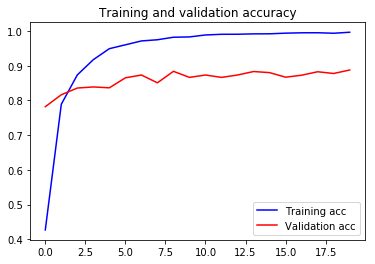

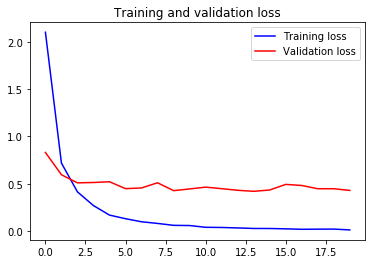

In [17]:
plot_training_process(history_inceptionV3_retrainable_layers)

Found 1600 images belonging to 21 classes.
100/100 [==============================] - 11s 105ms/step
No of errors = 180/1600


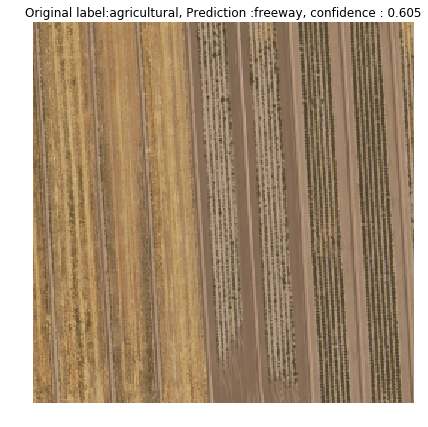

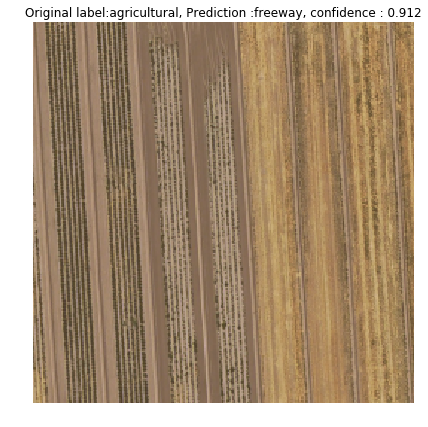

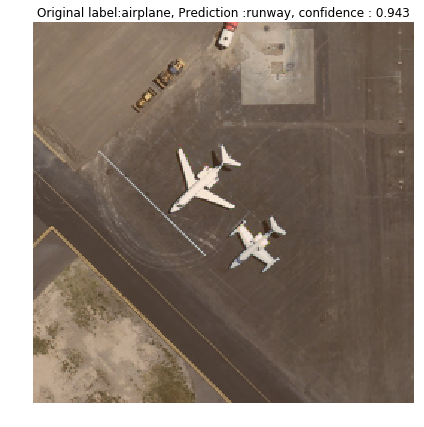

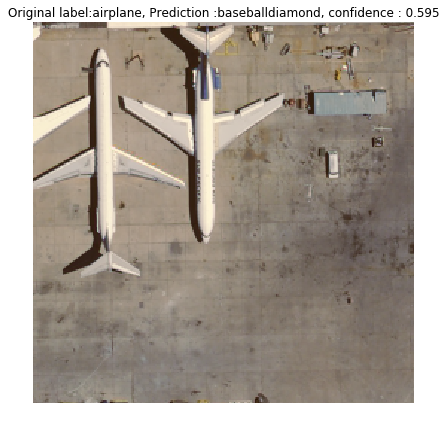

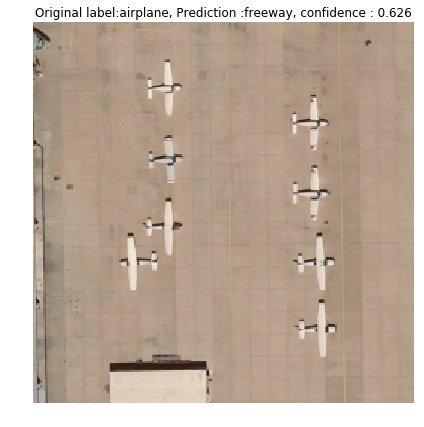

In [18]:
show_result(model=model_trained_inceptionV3_retrainable_layers, image_size=image_size, test_folder=test_folder)